# Цифровые full data-driven модели ценообразования на рынке сельскохозяйственных земель Омской области в третьем квартале 2024 года (материал находится в разработе)

[К.А. Мурашев](https://t.me/Kirjasalo)* (ООО "Совконсалт"), [Е.В. Ткаченко](https://t.me/elen_1212)* (Некоммерческое партнёрство "Омская Коллегия Оценщиков"). * в алфавитном порядке

Данный материал представляет собой backend-часть исследования рынка сельскохозяйственных земель Омской области во 2-3 квартале 2024 года. Данный материал полностью основан на данных и не включает в себя какие-либо субъективные либо опросные значения. При его подготовке, использовался модуль'[Syväjärvi](https://t.me/AIinValuation)' разработанный компанией Sovconsult, DOO (Совконсалт, ООО) предназначенный для интеллектуального анализа данных рынков и разработки моделей ценообразования на основе технологий искусственного интеллекта. Исходные данные для анализа были предоставлены "[Омской Коллегией Оценщиков](https://око55.рф/)" и размещены в [свободном доступе](https://web.tresorit.com/l/jPHmL#6Z_L62XP4tDLQh2AhM2tMA) согласно ["Требованиям к использованию информации и данных в оценке, судебной и несудебной экспертизе при определении рыночной и иной стоимости объектов недвижимости"](http://sroroo.ru/upload/iblock/7f6/VO_02_24-small.pdf).

При разработке данного исследования, были использованы данные о 85 объектах представляющих собой оферты о продаже земельных участков для сельскохозяйственного производства. Сбор данных и их первичная обработка были осуществлены на стороне Омской коллегии оценщиков. 

Данный материал содержит следующие разделы:

1. Тематические карты: агроклиматическое зонирование, тепловая карта цен аналогов, тепловая карта средних и медианных цен по районам.
1. Описательные статистики рынка.
1. Изолированный анализ т.е., анализ влияние на стоимость каждого признака по отдельности.
1. Совместный анализ т.е., анализ влияние всех признаков с учётом их взаимодействия.
1. Предсказательные модели для расчёта стоимости включая онлайн-калькуляторы.

Данный материал предназначен для решения следующих задач:
1. Комплаенс мероприятия.
1. Антифродинговые процедуры.
1. Оценка рисков.
1. Информационное обеспечение подразделений экономической безопасности.
1. Автоматизированный налоговый контроль.
1. Формирование представления о ценообразовании на рынке сельскохозяйственных земель Омской области во втором и третьем квартале 2024 года.
1. Предсказание стоимости объектов на рынке сельскохозяйственных земель Омской области во втором и третьем квартале 2024 года на основе предложенных моделей.
1. Мониторинг стоимости активов и их портфелей.
1. Контроль результатов работы независимых оценщиков.
1. Ознакомление с технологиями анализа данных в оценке стоимости.
1. Автоматическое изготовление справок о стоимости для сотрудников Федеральной Службы Безопасности Российской Федерации, Следственного Комитета  Российской Федерации и Министерства Внутренних Дел Российской Федерации.

In [1]:
# Import libraries
import geopandas as gpd
import folium
from shapely.ops import unary_union
import pandas as pd
import json
import pandas as pd
import branca.colormap as cm
import random
import numpy as np
import seaborn as sns
from syvajarvirus55a243 import create_map_m0
from syvajarvirus55a243 import create_map_m1
from syvajarvirus55a243 import create_map_m2
from syvajarvirus55a243 import calculate_descriptive_statistics
from syvajarvirus55a243 import plot_violin_comparison
from syvajarvirus55a243 import plot_kde_comparison
from syvajarvirus55a243 import perform_mann_whitney_tests
from syvajarvirus55a243 import mann_whitney_effect_sizes
from syvajarvirus55a243 import perform_roc_analysis
from syvajarvirus55a243 import perform_logistic_regression

# Set random  seed
random.seed(552644099)  # Set seed for reproducibility

## Тематические карты

### Агроклиматическое зонирование Омской области

Согласно данным Омской колегии оценщиков, в Омской области выделяют две климатические зоны: северную и южную, а также четыре агроклиматических района: северный, северная лесостепь, южная лесостепь, степь. Далее приводится код для построения интерактивной карты. В правом верхнем углу находится кнопка вызова меню для управления слоями.  Картографическая основа [OpenStreetMap](https://www.openstreetmap.org) (Лицензия: [Open Data Commons Open Database License (ODbL)](https://opendatacommons.org/licenses/odbl/)). При построении карты использовались правила зоны UTM Zone 43N и соответствующая ей проекция epsg=32643.

In [2]:
# Specify the path to your GeoJSON file
geojson_path = 'omsk_region.geojson'

# Create the map m0
m0 = create_map_m0(geojson_path)

# Display the map
m0

### Ценовое зонирование

Построим карту наблюдений. Цвет точки зависит от цены за 1 кв. м. Тепловая шкала показана в верхней части карты. При наведении курсора на объект, всплывает инфомационное окно с основными сведениям о нём. Управление слоями также осуществляется с помощью кнопки в правом верхнем углу.

In [3]:
# Specify the paths to your GeoJSON and CSV files
geojson_path = 'omsk_region.geojson'
csv_path = 'data_omsk_agro_243.csv'

# Create the map m1
m1 = create_map_m1(geojson_path, csv_path)

# Display the map
m1

Построим тепловую карту средних и медианных цен по районам. Переключение между средними и медианные ценами осуществляется кнопкой управления слоями.

In [5]:
# Specify the paths to your GeoJSON and CSV files
geojson_path = 'omsk_region.geojson'
csv_path = 'data_omsk_agro_243.csv'

# Create the map m2
m2 = create_map_m2(geojson_path, csv_path)

# Display the map
m2


### Описательные статистики рынка

Рассматриваемый набор данных, предоставленный НП "Омская коллегия оценщиков" включает следующие переменные:

1. id &mdash; универсальный идентификатор объекта;
1. latutude &mdash; широта объекта;
1. longitude  &mdash; долгота объекта;
1. climate_zone  &mdash; климатическая зона (северная либо южная);
1. agricultural_zone &mdash; агроклиматический район (северный, северная лесостепь, южная лесостепь, южная);
1. district &mdash; район расположения объекта;
1. price &mdash; цена оферты за объект в рублях, НДС не облагается;
1. area &mdash; площадь объекта в квадратных метрах;
1. ownership &mdash; тип права на объект: частная собственность либо долевая (в т.ч. пай);
1. permitted &mdash; вид разрешённого использования: сельскозяйственное использование, личное подсобное хозяйство;
1. actual &mdash; фактическое использование участка: пашня, сенокос, пастбище, кормовые угодья, не используется и т.д.;
1. crop_yield &mdash; балл бонитета;
1. capital_distance &mdash; расстояние от Омска;
1. elevator_distance &mdash; расстояние от ближайщего элеватора;
1. is_paved_road &mdash; индикатор наличия подъезда к участку по дороге с твёрдым покрытием;
1. shape &mdash; форма участка с точки зрения удобства механизированной обработки (простая, сложная);
1. is_marked &mdash; индикатор наличия установленных границ участка;
1. is_coast &mdash; индикатор наличия собственной береговой линии;
1. offer_date &mdash; дата фиксации оферты;
1. is_brokerage &mdash; индикатор наличия посредника в виде агентства недвижимости;
1. is_single &mdash; индикатор одноконтурности участка;
1. is_electricity &mdash; индикатор электрификации участка;
1. is_gas &mdash; индикатор газификации участка.


Рассчитаем основные метрики для количественных переменных: 'price', 'area', 'price_per_sqm', 'crop_yield', 'capital_distance', 'elevator_distance'. Среди таких метрик: среднее, медиана, минимальное, максимальное, размах, дисперсия, стандартное отклонение, коэффициент ассиметрии, коэффициент эксцесса, 5, 10, 25, 50, 75, 90, 95 перцентили, коэффициент вариации, среднее абсолютное отклонение.


In [2]:
# Read data
df = pd.read_csv('data_omsk_agro_243.csv')

# List of numerical columns to analyze
df['price_per_sqm'] = df['price'] / df['area']

In [5]:
# Define numerical columns list
numerical_columns = ['price', 'area', 'price_per_sqm', 'crop_yield', 'capital_distance', 'elevator_distance']

# Calculate descriptive statistics
stats_df = calculate_descriptive_statistics(df, numerical_columns)

# Display the statistics
print(stats_df)

                   count          mean          median           min  \
price               85.0  1.823262e+06  1000000.000000  85000.000000   
area                85.0  4.523983e+05   141000.000000   9897.000000   
price_per_sqm       85.0  1.607616e+01        5.769231      0.118334   
crop_yield          85.0  6.215294e+01       70.000000     40.000000   
capital_distance    85.0  9.331765e+01       74.000000      0.000000   
elevator_distance   85.0  5.925882e+01       38.000000      1.500000   

                            max         range      variance       std_dev  \
price              1.300000e+07  1.291500e+07  5.897653e+12  2.428508e+06   
area               1.121776e+07  1.120786e+07  1.744593e+12  1.320831e+06   
price_per_sqm      1.150370e+02  1.149186e+02  5.392571e+02  2.322191e+01   
crop_yield         7.300000e+01  3.300000e+01  1.187263e+02  1.089616e+01   
capital_distance   5.150000e+02  5.150000e+02  7.872624e+03  8.872781e+01   
elevator_distance  2.990000e+02  

Данные статистики доступны в файле `data_omsk_agro_243_stats.csv`.

In [16]:
stats_df.to_csv('data_omsk_agro_243_stats.csv', index=True)

Рассчитаем логарифмы количественных переменных, построим графики ядерной оценки плотности и проведём тест на нормальность распределения.

/home/kaarlahti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kaarlahti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


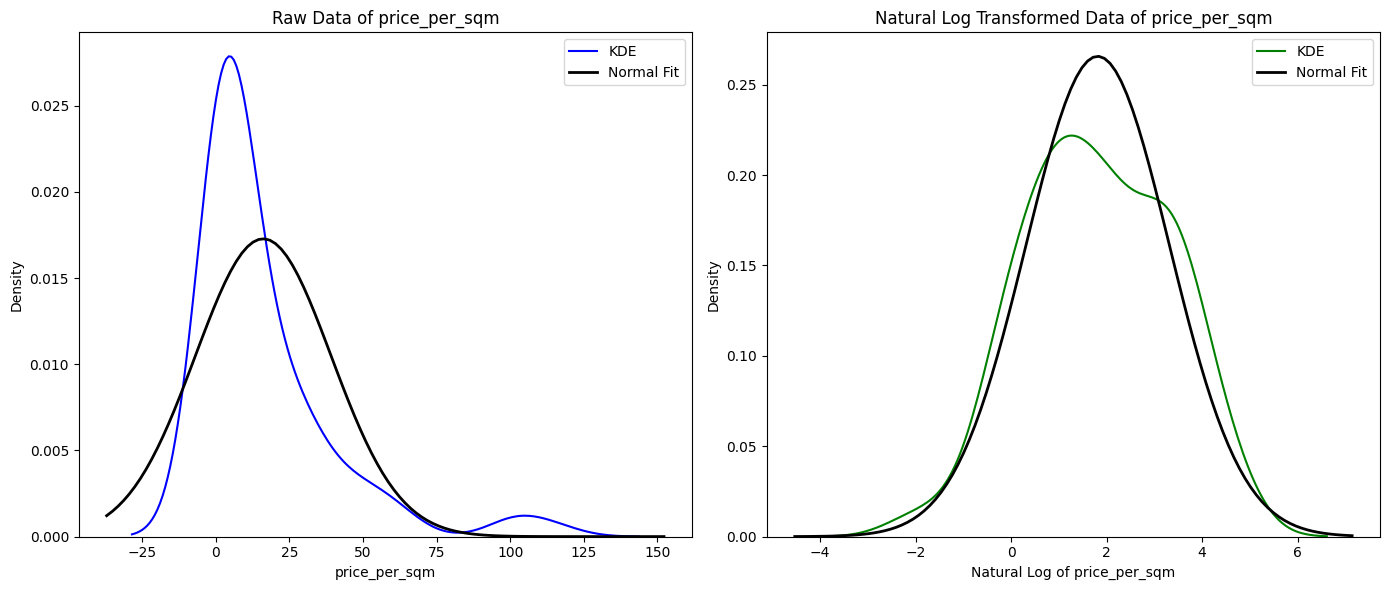


Summary Statistics for price_per_sqm:
count     85.000000
mean      16.076164
std       23.221910
min        0.118334
25%        2.000000
50%        5.769231
75%       23.863636
max      115.036976
Name: price_per_sqm, dtype: float64

Summary Statistics for Natural Log of price_per_sqm:
count    85.000000
mean      1.813108
std       1.510386
min      -2.134242
25%       0.693147
50%       1.752539
75%       3.172356
max       4.745254
Name: price_per_sqm, dtype: float64

Normality Tests:

Shapiro-Wilk Test for raw data:
Statistic=0.67786, p-value=0.00000

Shapiro-Wilk Test for log-transformed data:
Statistic=0.98303, p-value=0.32820

Raw data does not look normally distributed (reject H0 at alpha=0.05).
Log-transformed data looks normally distributed (fail to reject H0 at alpha=0.05).


In [3]:
# Import the function
from syvajarvirus55a243 import plot_kde_with_log_transform

# Specify the column of interest
column_of_interest = 'price_per_sqm'

# Call the function
plot_kde_with_log_transform(df, column=column_of_interest, log_base=np.e)


Таким образом, можно сделать вывод о логарифмически нормальном распределении удельных цен предложений.

/home/kaarlahti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kaarlahti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


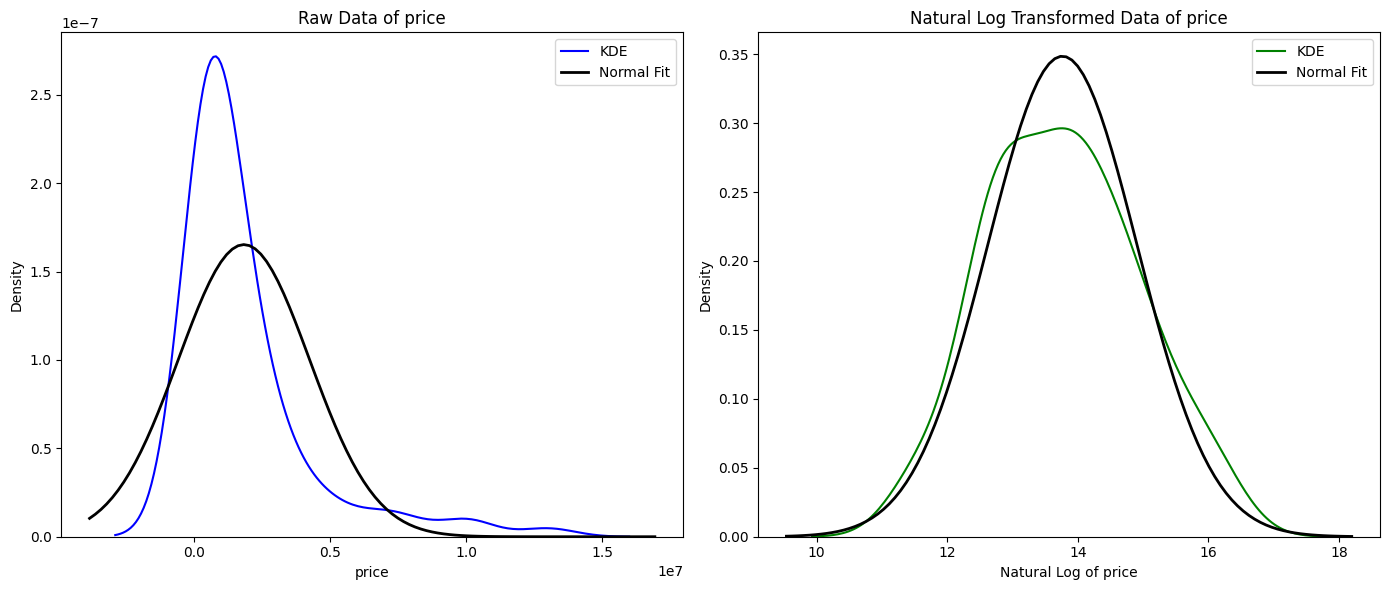


Summary Statistics for price:
count    8.500000e+01
mean     1.823262e+06
std      2.428508e+06
min      8.500000e+04
25%      3.800000e+05
50%      1.000000e+06
75%      2.099000e+06
max      1.300000e+07
Name: price, dtype: float64

Summary Statistics for Natural Log of price:
count    85.000000
mean     13.763149
std       1.151554
min      11.350407
25%      12.847927
50%      13.815511
75%      14.556972
max      16.380460
Name: price, dtype: float64

Normality Tests:

Shapiro-Wilk Test for raw data:
Statistic=0.66857, p-value=0.00000

Shapiro-Wilk Test for log-transformed data:
Statistic=0.98588, p-value=0.48381

Raw data does not look normally distributed (reject H0 at alpha=0.05).
Log-transformed data looks normally distributed (fail to reject H0 at alpha=0.05).


In [4]:
# Specify the column of interest
column_of_interest = 'price'

# Call the function
plot_kde_with_log_transform(df, column=column_of_interest, log_base=np.e)

Таким образом, можно сделать вывод о логарифмически нормальном распределении абсолютных цен предложений.

/home/kaarlahti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kaarlahti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


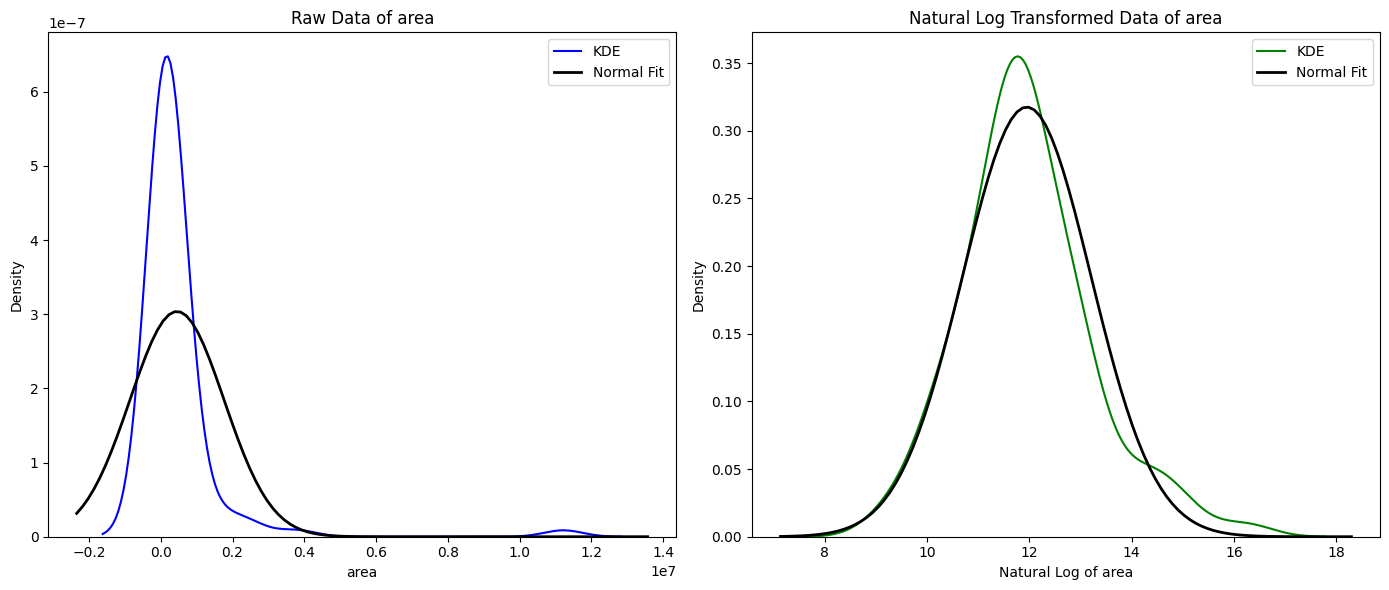


Summary Statistics for area:
count    8.500000e+01
mean     4.523983e+05
std      1.320831e+06
min      9.897000e+03
25%      7.000000e+04
50%      1.410000e+05
75%      3.199870e+05
max      1.121776e+07
Name: area, dtype: float64

Summary Statistics for Natural Log of area:
count    85.000000
mean     11.950041
std       1.263545
min       9.199987
25%      11.156251
50%      11.856515
75%      12.676036
max      16.233009
Name: area, dtype: float64

Normality Tests:

Shapiro-Wilk Test for raw data:
Statistic=0.29621, p-value=0.00000

Shapiro-Wilk Test for log-transformed data:
Statistic=0.96532, p-value=0.02188

Raw data does not look normally distributed (reject H0 at alpha=0.05).
Log-transformed data does not look normally distributed (reject H0 at alpha=0.05).


In [6]:
# Specify the column of interest
column_of_interest = 'area'

# Call the function
plot_kde_with_log_transform(df, column=column_of_interest, log_base=np.e)

/home/kaarlahti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kaarlahti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


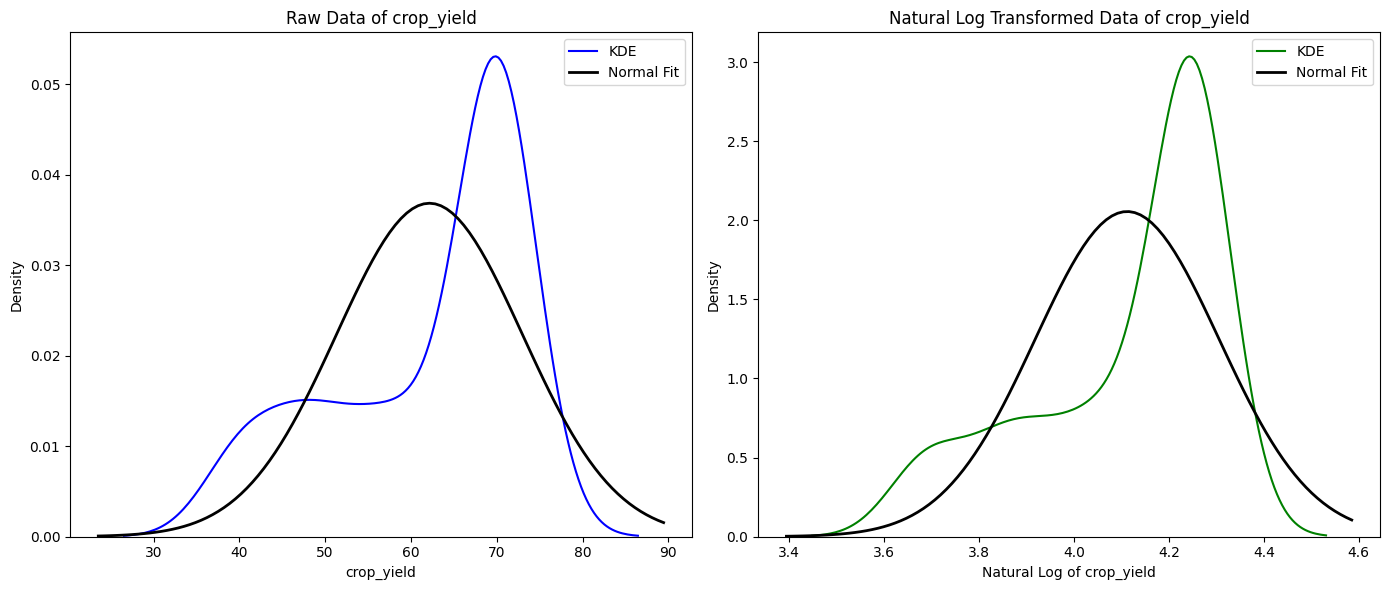


Summary Statistics for crop_yield:
count    85.000000
mean     62.152941
std      10.896161
min      40.000000
25%      54.000000
50%      70.000000
75%      70.000000
max      73.000000
Name: crop_yield, dtype: float64

Summary Statistics for Natural Log of crop_yield:
count    85.000000
mean      4.112081
std       0.195184
min       3.688879
25%       3.988984
50%       4.248495
75%       4.248495
max       4.290459
Name: crop_yield, dtype: float64

Normality Tests:

Shapiro-Wilk Test for raw data:
Statistic=0.77322, p-value=0.00000

Shapiro-Wilk Test for log-transformed data:
Statistic=0.75660, p-value=0.00000

Raw data does not look normally distributed (reject H0 at alpha=0.05).
Log-transformed data does not look normally distributed (reject H0 at alpha=0.05).


In [7]:
# Specify the column of interest
column_of_interest = 'crop_yield'

# Call the function
plot_kde_with_log_transform(df, column=column_of_interest, log_base=np.e)

Data contains zero or negative values. Shifting data by 2.0 to make all values positive.


/home/kaarlahti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kaarlahti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


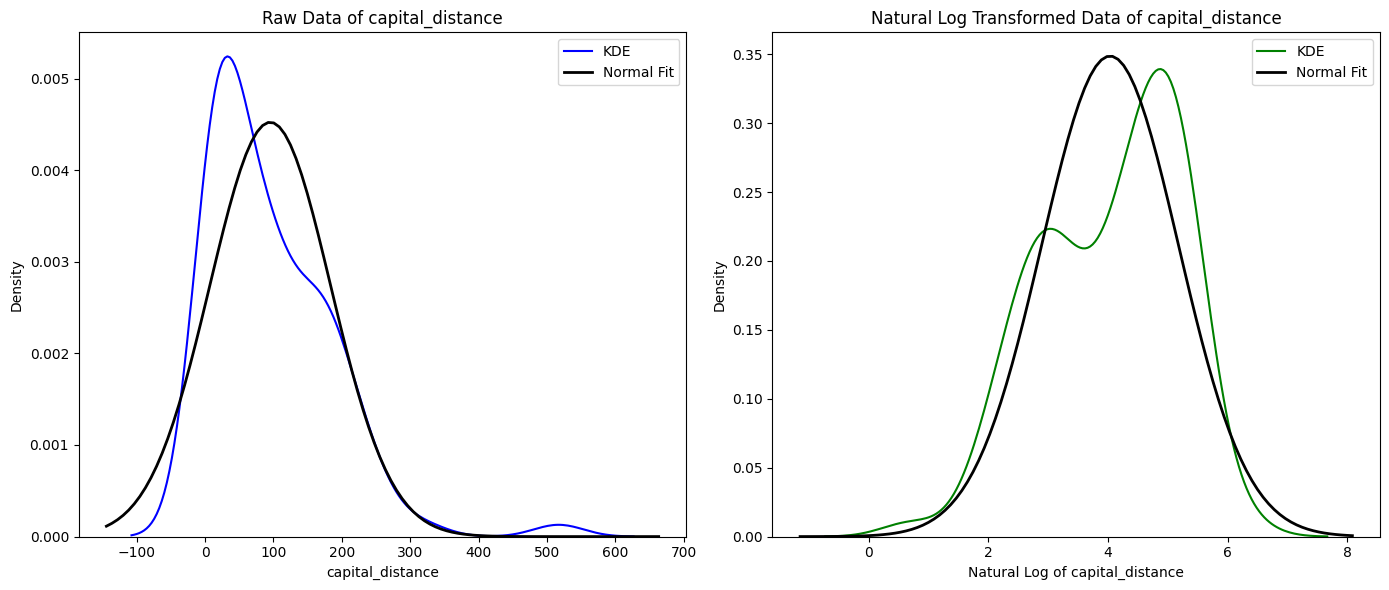


Summary Statistics for capital_distance:
count     85.000000
mean      95.317647
std       88.727809
min        2.000000
25%       21.000000
50%       76.000000
75%      157.000000
max      517.000000
Name: capital_distance, dtype: float64

Summary Statistics for Natural Log of capital_distance:
count    85.000000
mean      4.036218
std       1.150806
min       0.693147
25%       3.044522
50%       4.330733
75%       5.056246
max       6.248043
Name: capital_distance, dtype: float64

Normality Tests:

Shapiro-Wilk Test for raw data:
Statistic=0.84609, p-value=0.00000

Shapiro-Wilk Test for log-transformed data:
Statistic=0.95232, p-value=0.00330

Raw data does not look normally distributed (reject H0 at alpha=0.05).
Log-transformed data does not look normally distributed (reject H0 at alpha=0.05).


In [8]:
# Specify the column of interest
column_of_interest = 'capital_distance'

# Call the function
plot_kde_with_log_transform(df, column=column_of_interest, log_base=np.e)

/home/kaarlahti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kaarlahti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


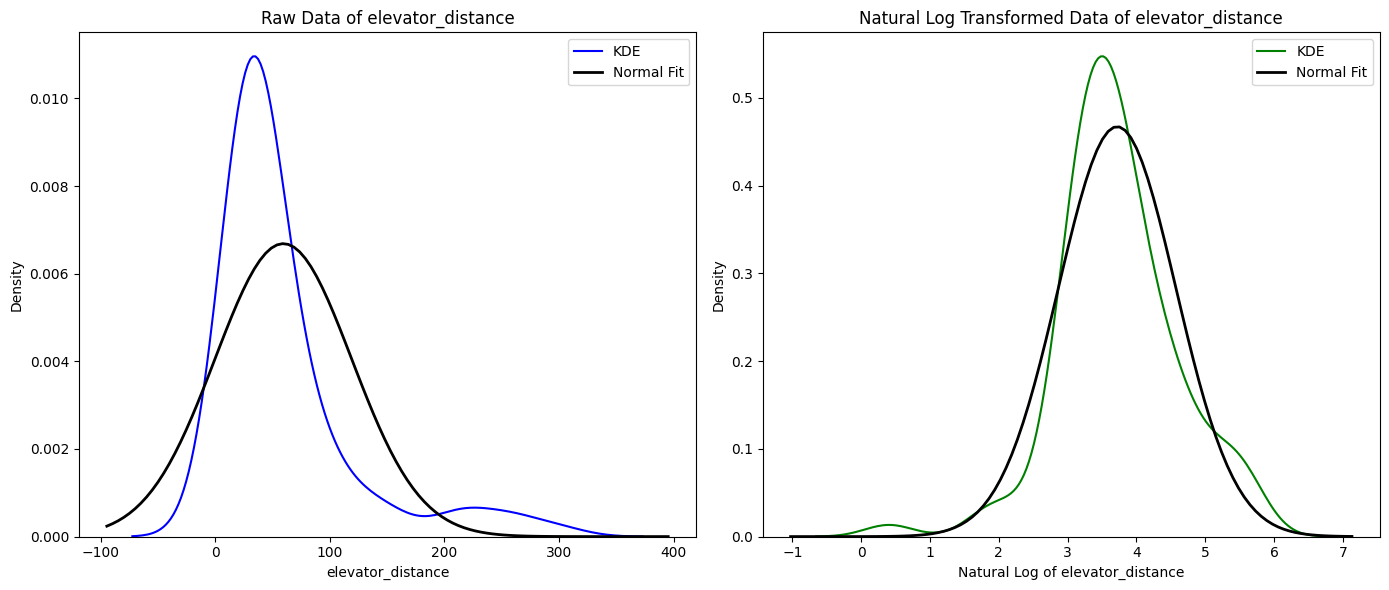


Summary Statistics for elevator_distance:
count     85.000000
mean      59.258824
std       60.024480
min        1.500000
25%       24.500000
50%       38.000000
75%       67.000000
max      299.000000
Name: elevator_distance, dtype: float64

Summary Statistics for Natural Log of elevator_distance:
count    85.000000
mean      3.719562
std       0.858789
min       0.405465
25%       3.198673
50%       3.637586
75%       4.204693
max       5.700444
Name: elevator_distance, dtype: float64

Normality Tests:

Shapiro-Wilk Test for raw data:
Statistic=0.69477, p-value=0.00000

Shapiro-Wilk Test for log-transformed data:
Statistic=0.94581, p-value=0.00136

Raw data does not look normally distributed (reject H0 at alpha=0.05).
Log-transformed data does not look normally distributed (reject H0 at alpha=0.05).


In [9]:
# Specify the column of interest
column_of_interest = 'elevator_distance'

# Call the function
plot_kde_with_log_transform(df, column=column_of_interest, log_base=np.e)

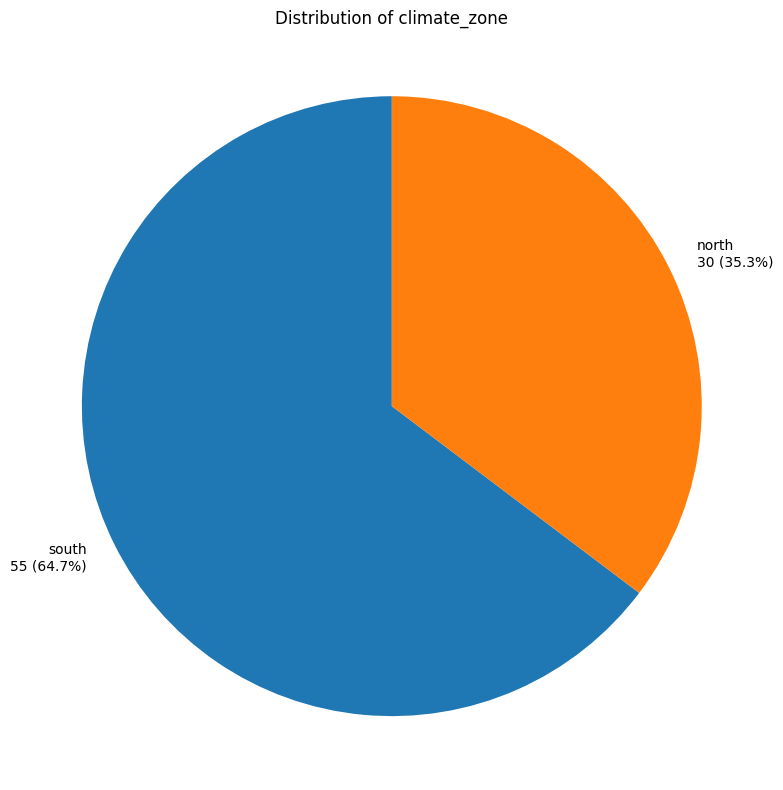

In [5]:
# Import the function
from syvajarvirus55a243 import plot_pie_chart

# Specify the column you want to visualize
column_to_visualize = 'climate_zone'

# Call the function
plot_pie_chart(df, column=column_to_visualize)


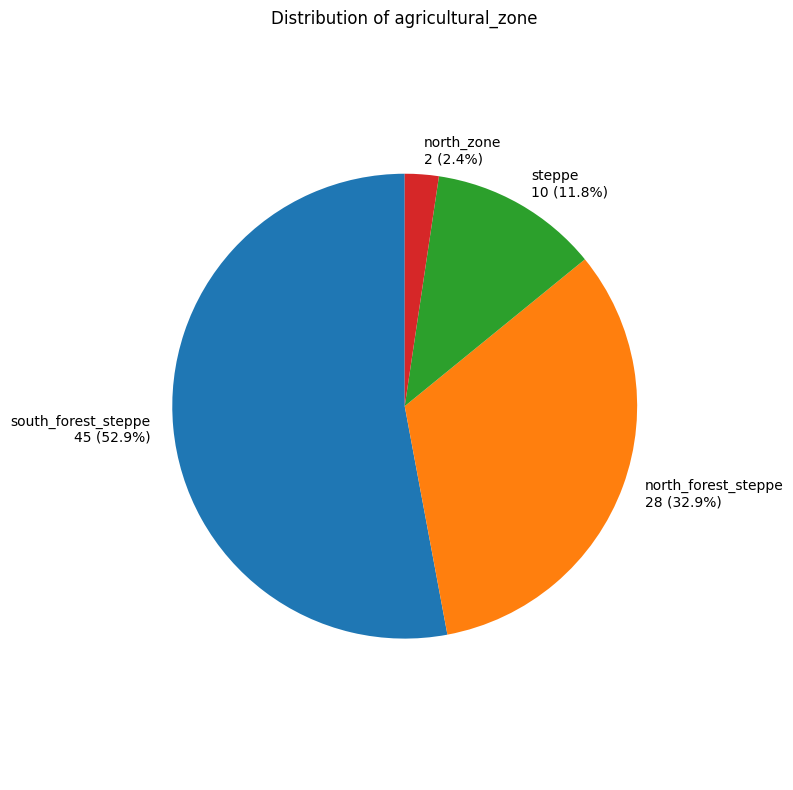

In [6]:
# Specify the column you want to visualize
column_to_visualize = 'agricultural_zone'

# Call the function
plot_pie_chart(df, column=column_to_visualize)

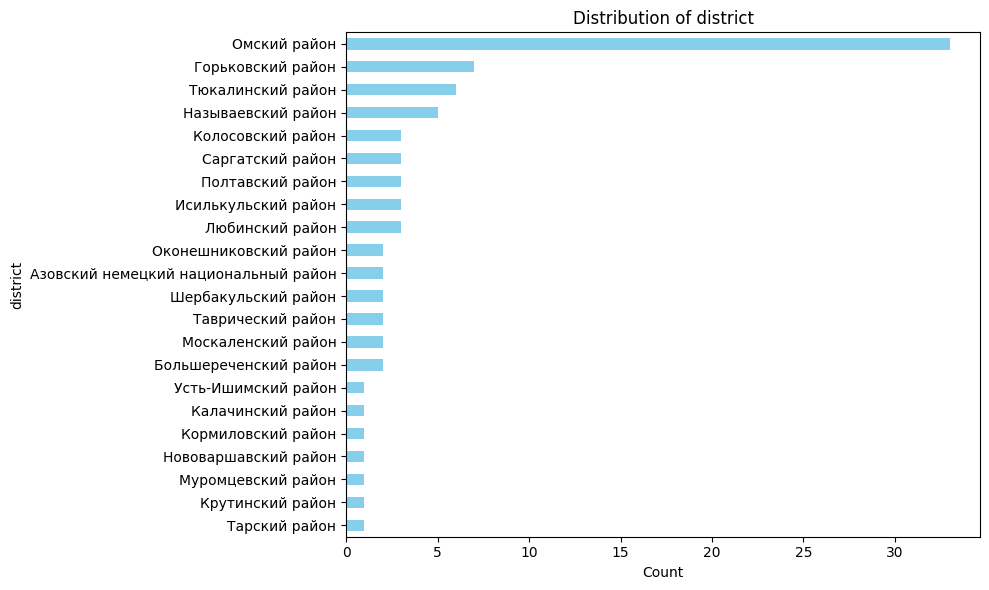

In [8]:
# Import the function
from syvajarvirus55a243 import plot_bar_chart

# Specify the column you want to visualize
column_to_visualize = 'district'

# Call the function
plot_bar_chart(df, column=column_to_visualize)

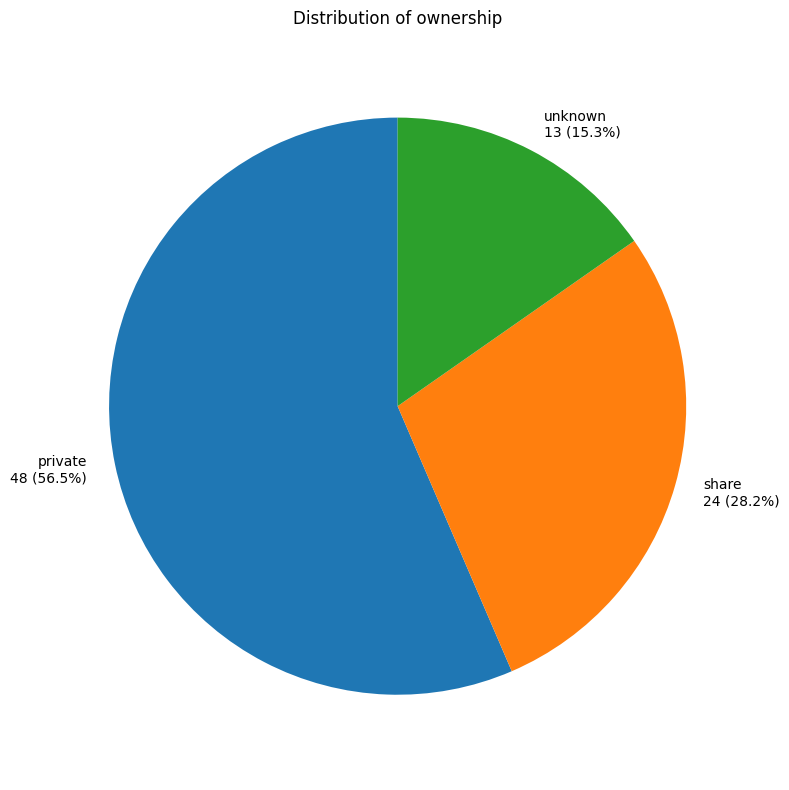

In [9]:
# Specify the column you want to visualize
column_to_visualize = 'ownership'

# Call the function
plot_pie_chart(df, column=column_to_visualize)

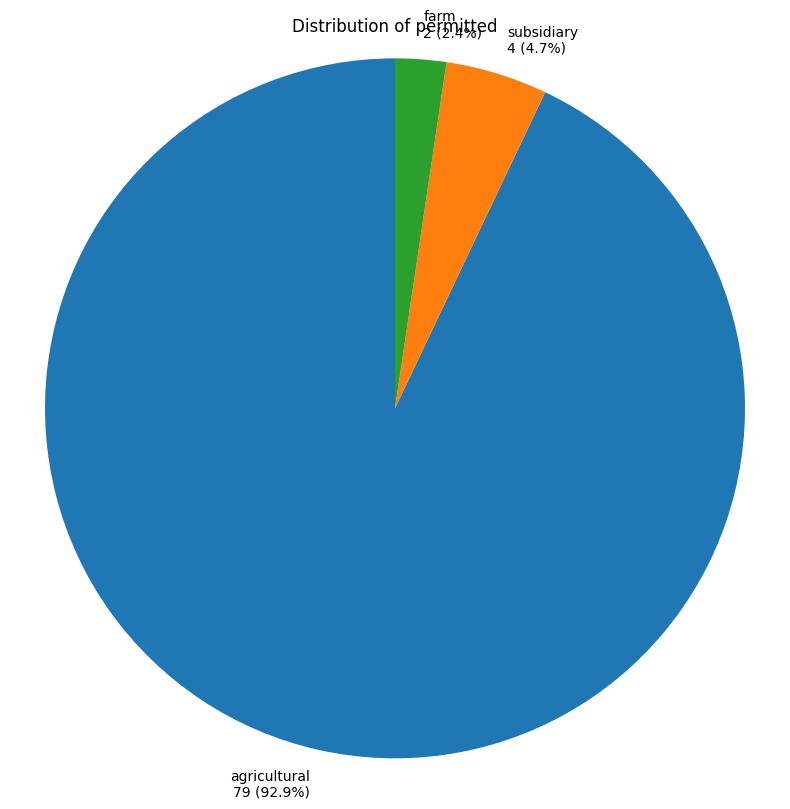

In [10]:
# Specify the column you want to visualize
column_to_visualize = 'permitted'

# Call the function
plot_pie_chart(df, column=column_to_visualize)

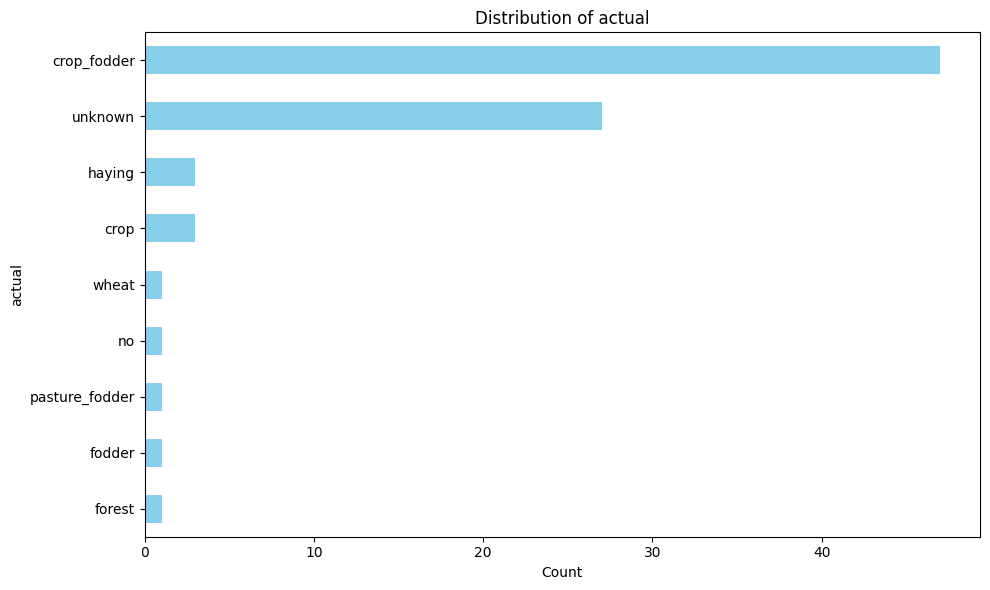

In [12]:
# Specify the column you want to visualize
column_to_visualize = 'actual'

# Call the function
plot_bar_chart(df, column=column_to_visualize)

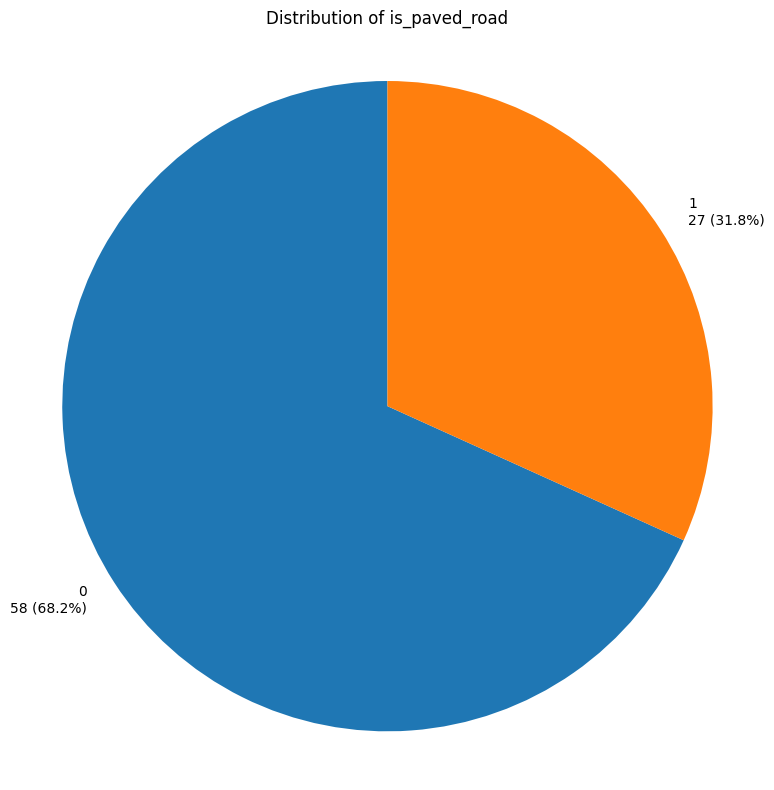

In [13]:
# Specify the column you want to visualize
column_to_visualize = 'is_paved_road'

# Call the function
plot_pie_chart(df, column=column_to_visualize)

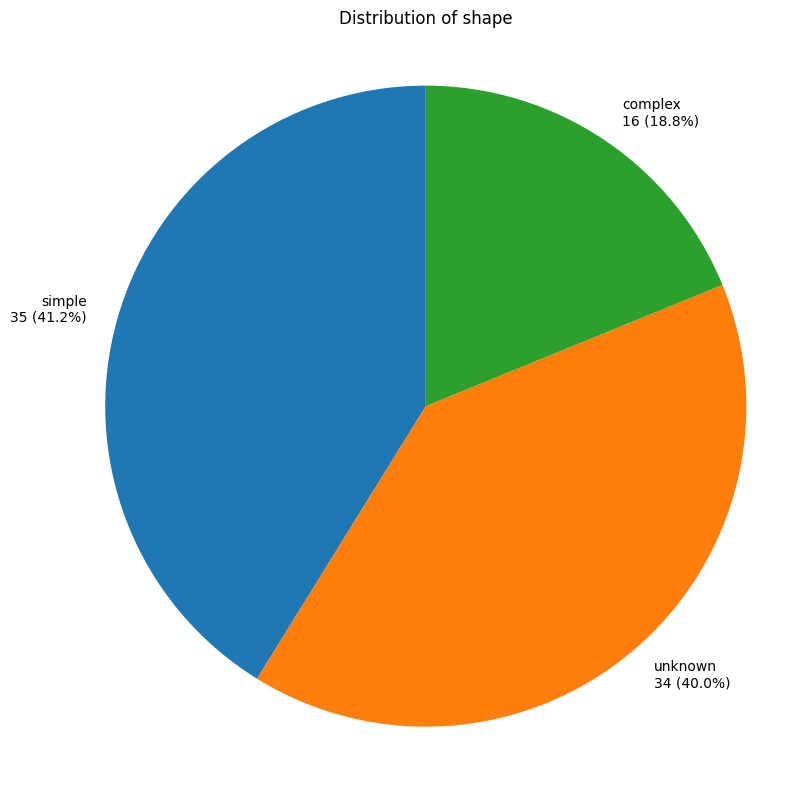

In [14]:
# Specify the column you want to visualize
column_to_visualize = 'shape'

# Call the function
plot_pie_chart(df, column=column_to_visualize)

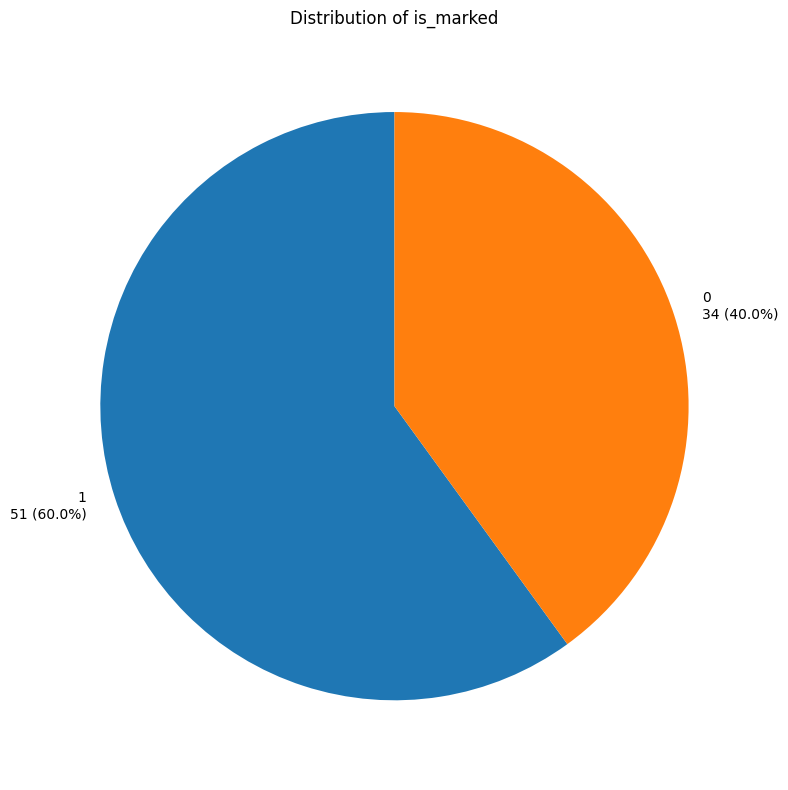

In [15]:
# Specify the column you want to visualize
column_to_visualize = 'is_marked'

# Call the function
plot_pie_chart(df, column=column_to_visualize)

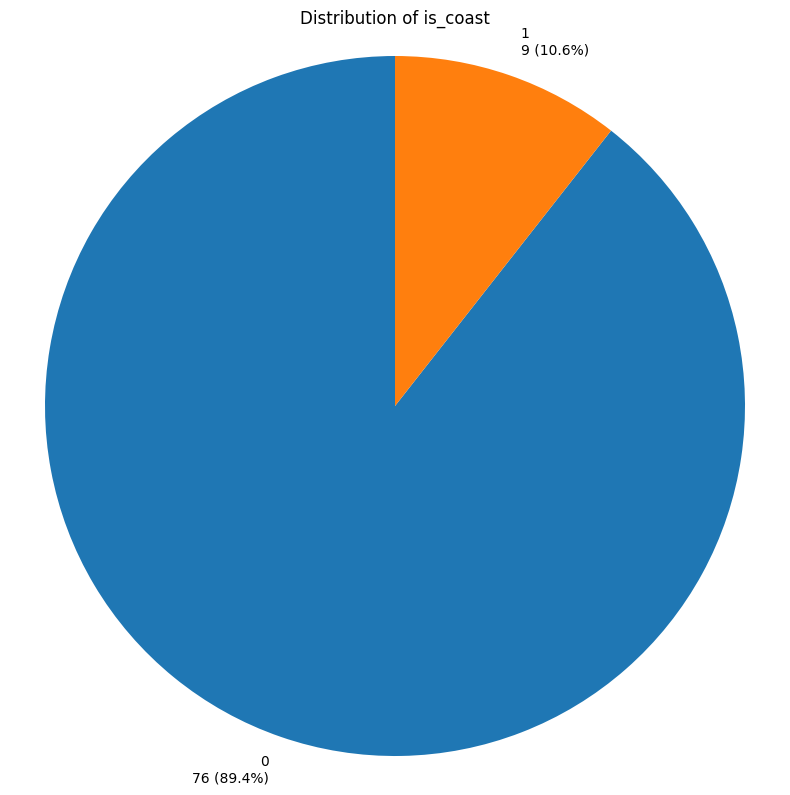

In [16]:
# Specify the column you want to visualize
column_to_visualize = 'is_coast'

# Call the function
plot_pie_chart(df, column=column_to_visualize)

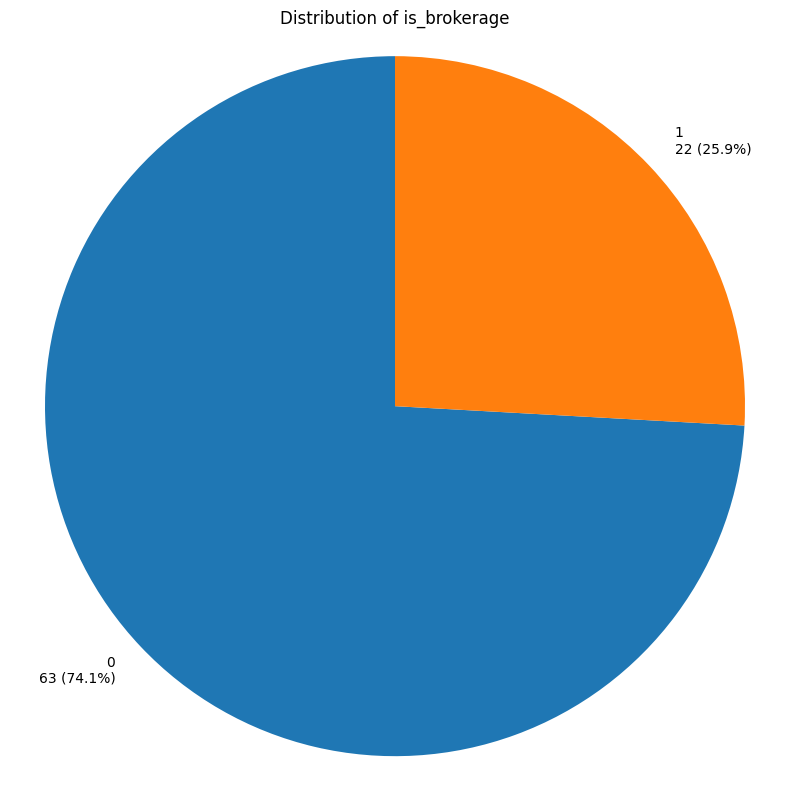

In [17]:
# Specify the column you want to visualize
column_to_visualize = 'is_brokerage'

# Call the function
plot_pie_chart(df, column=column_to_visualize)

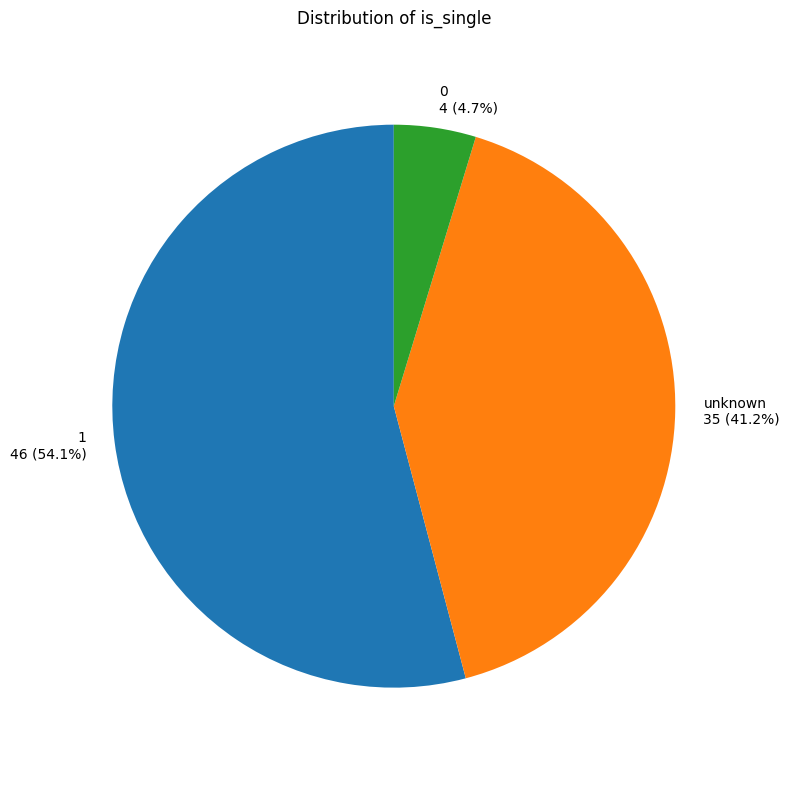

In [18]:
# Specify the column you want to visualize
column_to_visualize = 'is_single'

# Call the function
plot_pie_chart(df, column=column_to_visualize)

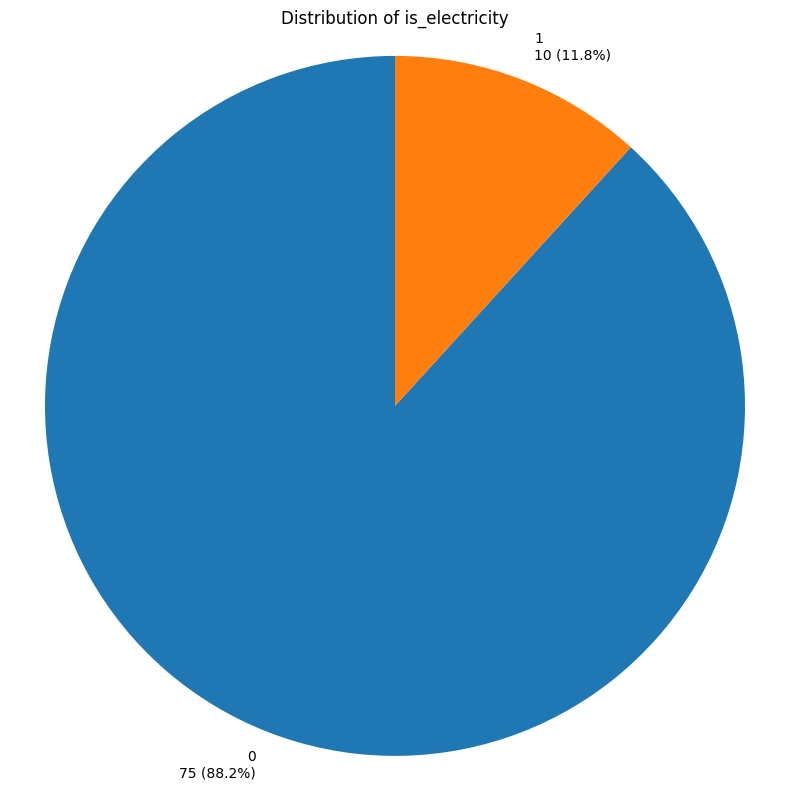

In [19]:
# Specify the column you want to visualize
column_to_visualize = 'is_electricity'

# Call the function
plot_pie_chart(df, column=column_to_visualize)

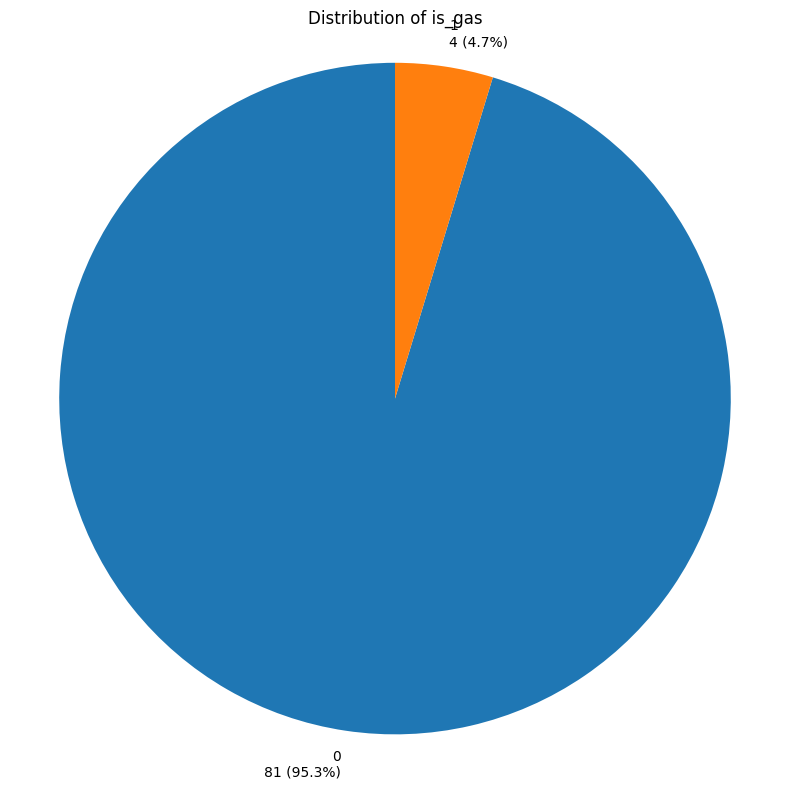

In [20]:
# Specify the column you want to visualize
column_to_visualize = 'is_gas'

# Call the function
plot_pie_chart(df, column=column_to_visualize)

## Изолированный анализ

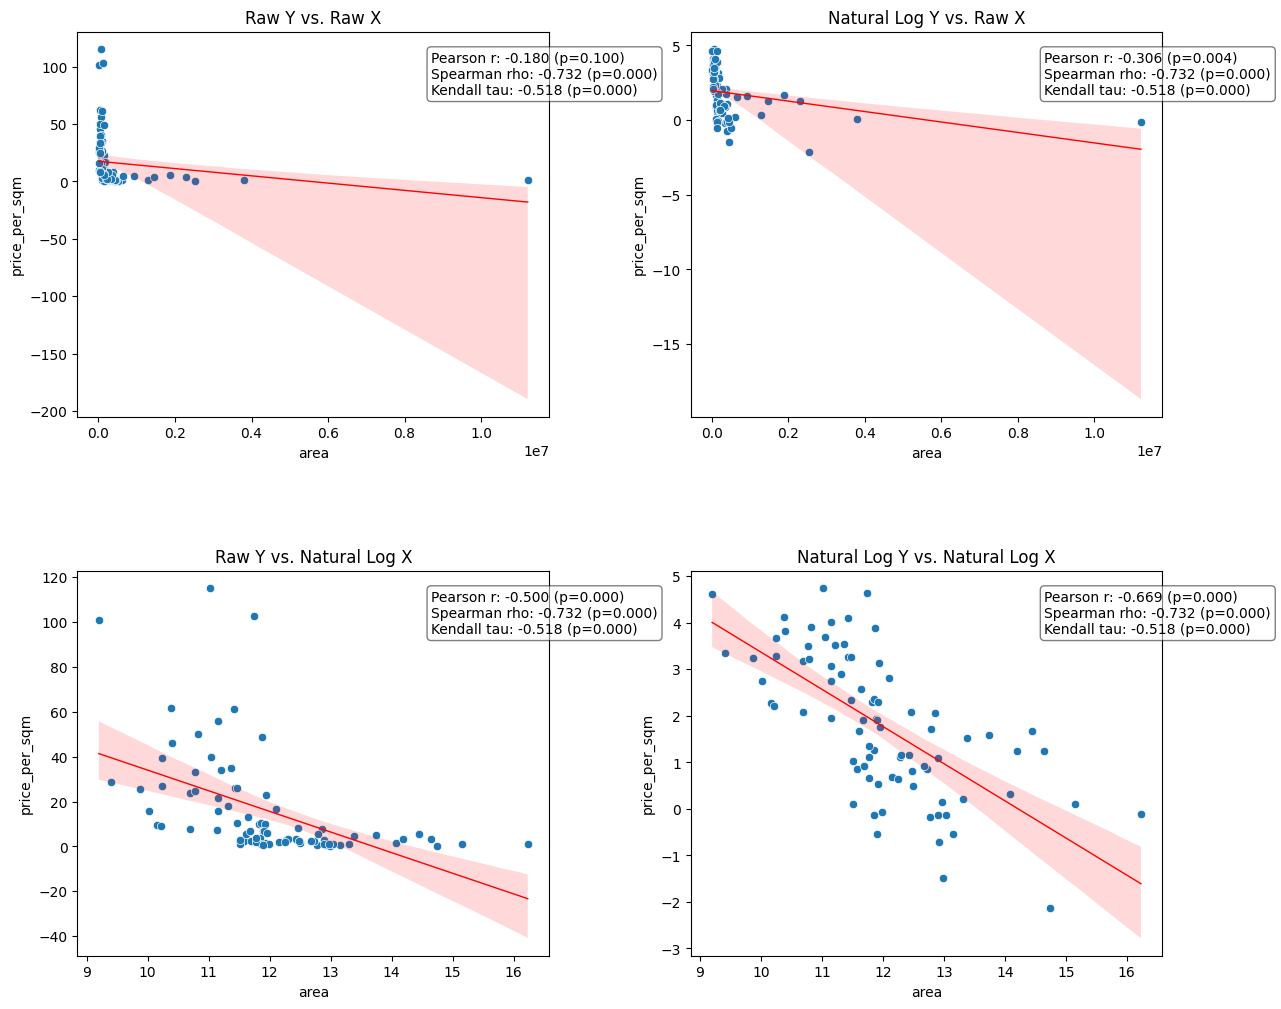

In [3]:
# Import the function
from syvajarvirus55a243 import plot_isolated_analysis

# Specify the columns
price_column = 'price_per_sqm'  # Your price per sqm column
variable_column = 'area'        # The variable you want to analyze (e.g., 'area')

# Call the function
plot_isolated_analysis(df, price_column=price_column, variable_column=variable_column, log_base=np.e)


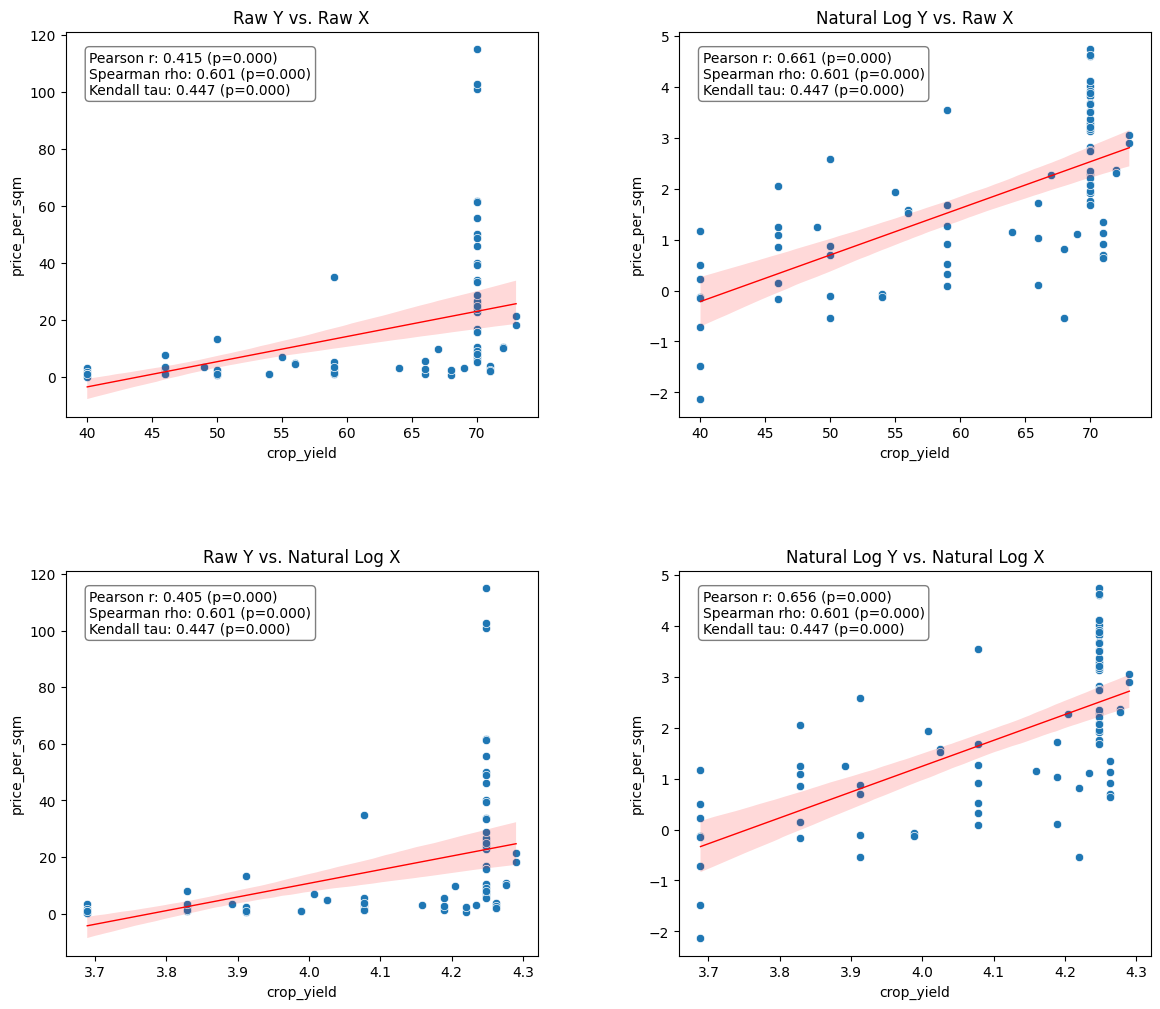

In [5]:
# Specify the columns
price_column = 'price_per_sqm'  # Your price per sqm column
variable_column = 'crop_yield'        # The variable you want to analyze (e.g., 'area')

# Call the function
plot_isolated_analysis(df, price_column=price_column, variable_column=variable_column, log_base=np.e)

Data in 'capital_distance' contains zero or negative values. Shifting data by 2.00000.


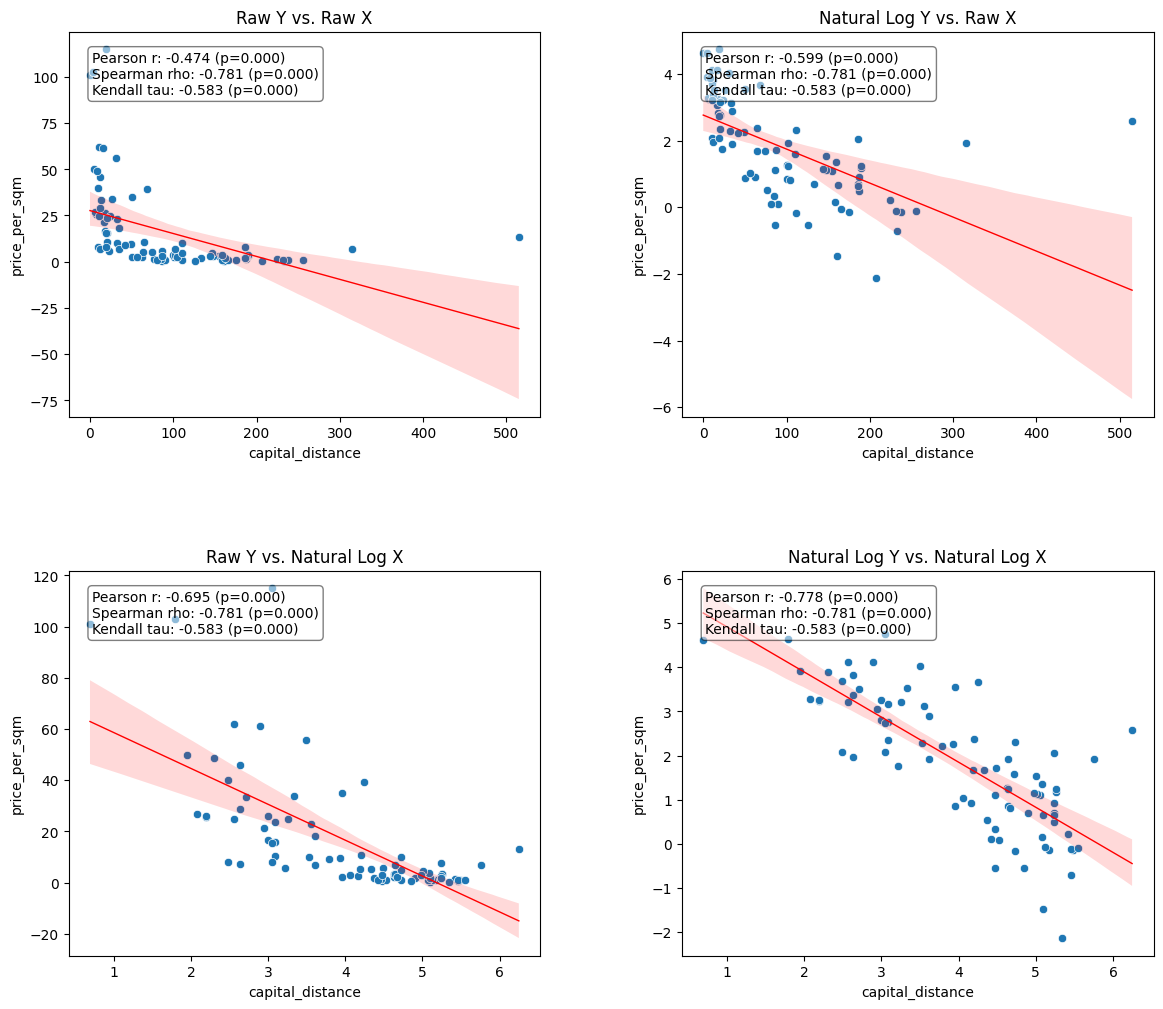

In [6]:
# Specify the columns
price_column = 'price_per_sqm'  # Your price per sqm column
variable_column = 'capital_distance'        # The variable you want to analyze (e.g., 'area')

# Call the function
plot_isolated_analysis(df, price_column=price_column, variable_column=variable_column, log_base=np.e)

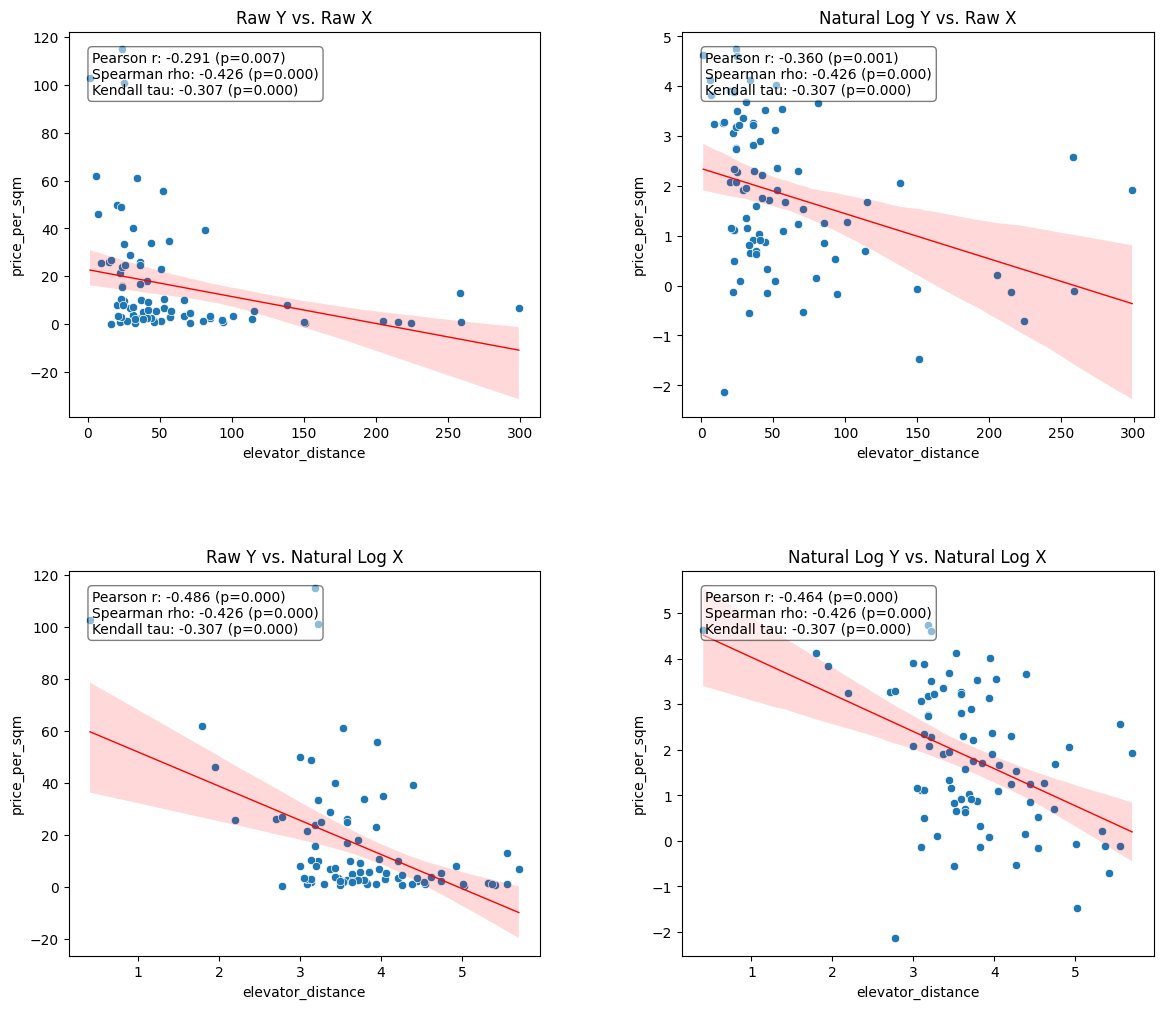

In [7]:
# Specify the columns
price_column = 'price_per_sqm'  # Your price per sqm column
variable_column = 'elevator_distance'        # The variable you want to analyze (e.g., 'area')

# Call the function
plot_isolated_analysis(df, price_column=price_column, variable_column=variable_column, log_base=np.e)

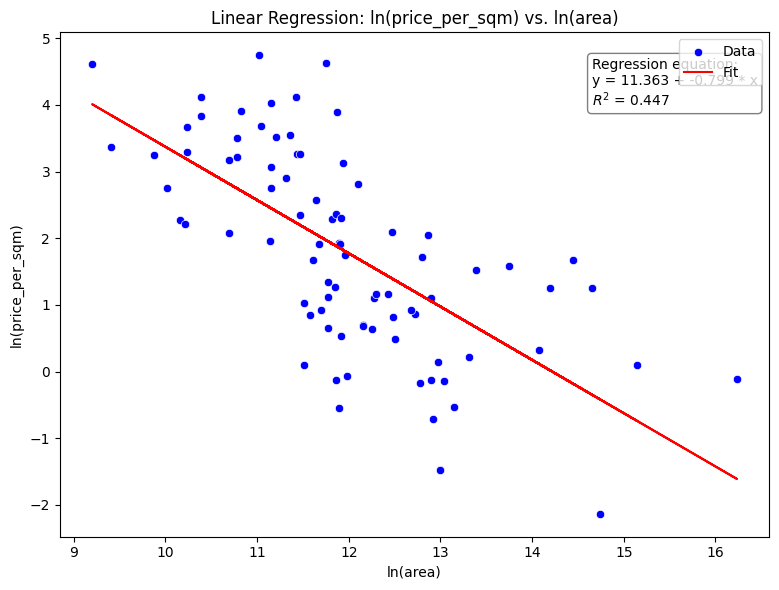

In [4]:
# Import the function
from syvajarvirus55a243 import linear_regression_plot

# Specify the columns
y_column = 'price_per_sqm'   # Dependent variable
x_column = 'area'            # Independent variable

# Analyze the relationship with log-transformed Y and X
linear_regression_plot(df, y_column='price_per_sqm', x_column='area', use_log_y=True, use_log_x=True)

In [5]:
# Import the function from your module
from syvajarvirus55a243 import perform_linear_regression

# Specify the columns
y_column = 'price_per_sqm'   # Dependent variable
x_column = 'area'            # Independent variable

# Example 1: Raw values for both Y and X
results = perform_linear_regression(df, y_column, x_column, use_log_y=True, use_log_x=True)

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     67.08
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           2.72e-12
Time:                        10:26:55   Log-Likelihood:                -129.99
No. Observations:                  85   AIC:                             264.0
Df Residuals:                      83   BIC:                             268.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3629      1.172      9.691      0.0

In [4]:
# Import the function from your module
from syvajarvirus55a243 import perform_linear_regression

# Specify the columns
y_column = 'price_per_sqm'   # Dependent variable
x_column = 'area'            # Independent variable
df_filtered = df[df['district'] == 'Омский район'] # Filter the DataFrame for the specific district

# Example 1: Raw values for both Y and X
results = perform_linear_regression(df_filtered,
                                    y_column, x_column,
                                    use_log_y=True, use_log_x=True)

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     6.434
Date:                Thu, 31 Oct 2024   Prob (F-statistic):             0.0164
Time:                        19:55:25   Log-Likelihood:                -37.957
No. Observations:                  33   AIC:                             79.91
Df Residuals:                      31   BIC:                             82.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1961      1.580      4.556      0.0

In [12]:
# Import the function from your module
from syvajarvirus55a243 import perform_linear_regression

# Specify the columns
y_column = 'price_per_sqm'   # Dependent variable
x_column = 'area'            # Independent variable
df_filtered = df[df['district'] != 'Омский район'] # Filter the DataFrame for the specific district

# Example 1: Raw values for both Y and X
results = perform_linear_regression(df_filtered,
                                    y_column, x_column,
                                    use_log_y=True, use_log_x=True)

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     15.19
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           0.000289
Time:                        14:18:40   Log-Likelihood:                -72.242
No. Observations:                  52   AIC:                             148.5
Df Residuals:                      50   BIC:                             152.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0590      1.578      4.472      0.0

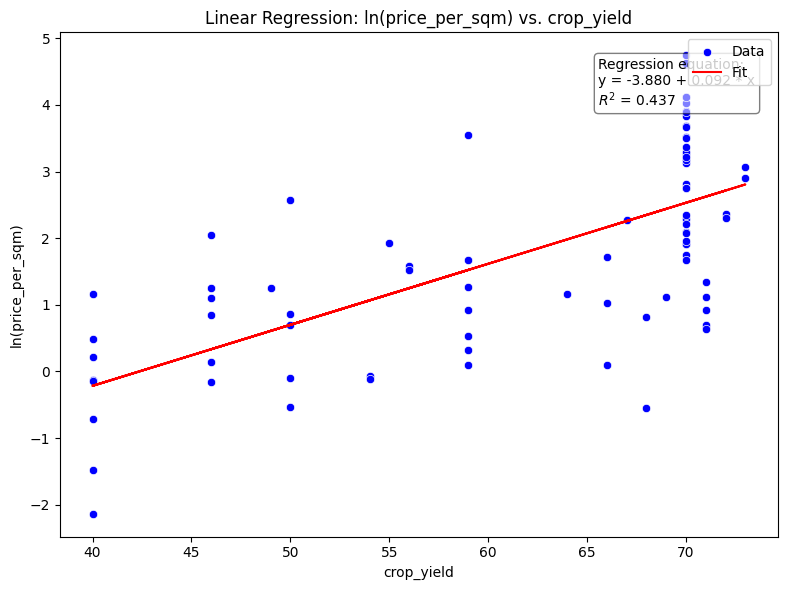

In [13]:
# Import the function
from syvajarvirus55a243 import linear_regression_plot

# Specify the columns
y_column = 'price_per_sqm'   # Dependent variable
x_column = 'crop_yield'      # Independent variable

# Analyze the relationship with log-transformed Y and X
linear_regression_plot(df, y_column='price_per_sqm', x_column='crop_yield', use_log_y=True, use_log_x=False)

In [14]:
# Specify the columns
y_column = 'price_per_sqm'   # Dependent variable
x_column = 'crop_yield'      # Independent variable

# Example 1: Raw values for both Y and X
results = perform_linear_regression(df, y_column, x_column, use_log_y=True, use_log_x=False)

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     64.33
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           5.92e-12
Time:                        14:34:57   Log-Likelihood:                -130.77
No. Observations:                  85   AIC:                             265.5
Df Residuals:                      83   BIC:                             270.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8798      0.720     -5.385      0.0

In [15]:
# Specify the columns
y_column = 'price_per_sqm'   # Dependent variable
x_column = 'crop_yield'      # Independent variable
df_filtered = df[df['district'] == 'Омский район'] # Filter the DataFrame for the specific district

# Example 1: Raw values for both Y and X
results = perform_linear_regression(df_filtered,
                                    y_column, x_column,
                                    use_log_y=True, use_log_x=True)

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                nan
Time:                        12:52:55   Log-Likelihood:                -41.069
No. Observations:                  33   AIC:                             84.14
Df Residuals:                      32   BIC:                             85.63
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crop_yield     0.7543      0.035     21.583      0.0

In [6]:
# Specify the columns
y_column = 'price_per_sqm'   # Dependent variable
x_column = 'crop_yield'            # Independent variable
df_filtered = df[df['district'] != 'Омский район'] # Filter the DataFrame for the specific district

# Example 1: Raw values for both Y and X
results = perform_linear_regression(df_filtered,
                                    y_column, x_column,
                                    use_log_y=True, use_log_x=False)

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     16.46
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           0.000174
Time:                        19:57:51   Log-Likelihood:                -71.740
No. Observations:                  52   AIC:                             147.5
Df Residuals:                      50   BIC:                             151.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8590      0.701     -2.653      0.0

Data in 'capital_distance' contains zero or negative values. Shifting data by 2.00000.


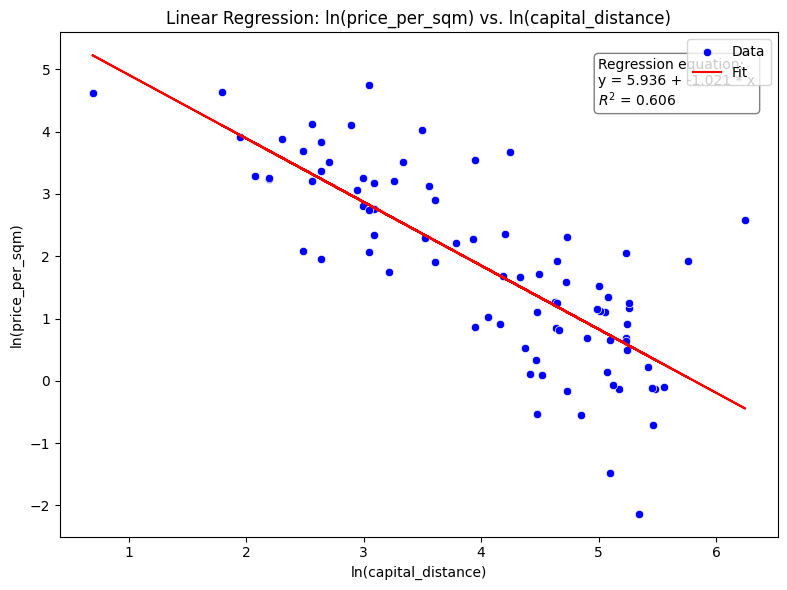

In [5]:
# Specify the columns
y_column = 'price_per_sqm'   # Dependent variable
x_column = 'capital_distance'            # Independent variable

# Analyze the relationship with log-transformed Y and X
linear_regression_plot(df, y_column=y_column, x_column=x_column, use_log_y=True, use_log_x=True)

In [8]:
# Specify the columns
y_column = 'price_per_sqm'       # Dependent variable
x_column = 'capital_distance'    # Independent variable

# Example 1: Raw values for both Y and X
results = perform_linear_regression(df, y_column, x_column,
                                    use_log_y=True, use_log_x=True)

Data in 'capital_distance' contains zero or negative values. Shifting data by 2.00000.
                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     127.5
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           1.87e-18
Time:                        21:12:31   Log-Likelihood:                -115.60
No. Observations:                  85   AIC:                             235.2
Df Residuals:                      83   BIC:                             240.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [20]:
# Filter the DataFrame for the specific district
df_filtered = df[df['district'] == 'Омский район']
print(df_filtered[["capital_distance"]].describe())

       capital_distance
count         33.000000
mean          19.787879
std           16.266833
min            0.000000
25%           10.000000
50%           18.000000
75%           23.000000
max           74.000000


In [22]:
# Specify the columns
y_column = 'price_per_sqm'                         # Dependent variable
x_column = 'capital_distance'                      # Independent variable
df_filtered = df[df['district'] == 'Омский район'] # Filter the DataFrame for the specific district

# Example 1: Raw values for both Y and X
results = perform_linear_regression(df_filtered,
                                    y_column, x_column,
                                    use_log_y=True, use_log_x=True)

Data in 'capital_distance' contains zero or negative values. Shifting data by 2.00000.
                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     9.531
Date:                Thu, 31 Oct 2024   Prob (F-statistic):            0.00423
Time:                        21:57:17   Log-Likelihood:                -36.646
No. Observations:                  33   AIC:                             77.29
Df Residuals:                      31   BIC:                             80.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [24]:
# Filter the DataFrame for the specific district
df_filtered = df[df['district'] != 'Омский район']
print(df_filtered[['price_per_sqm']].describe())

       price_per_sqm
count      52.000000
mean        4.593874
std         6.127602
min         0.118334
25%         1.144878
50%         2.500051
75%         5.010264
max        34.883721


In [25]:
# Specify the columns
y_column = 'price_per_sqm'                         # Dependent variable
x_column = 'capital_distance'                      # Independent variable
df_filtered = df[df['district'] != 'Омский район'] # Filter the DataFrame for the specific district

# Example 1: Raw values for both Y and X
results = perform_linear_regression(df_filtered,
                                    y_column, x_column,
                                    use_log_y=True, use_log_x=True)

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     11.84
Date:                Thu, 31 Oct 2024   Prob (F-statistic):            0.00118
Time:                        22:23:32   Log-Likelihood:                -73.617
No. Observations:                  52   AIC:                             151.2
Df Residuals:                      50   BIC:                             155.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.6541      1.092  

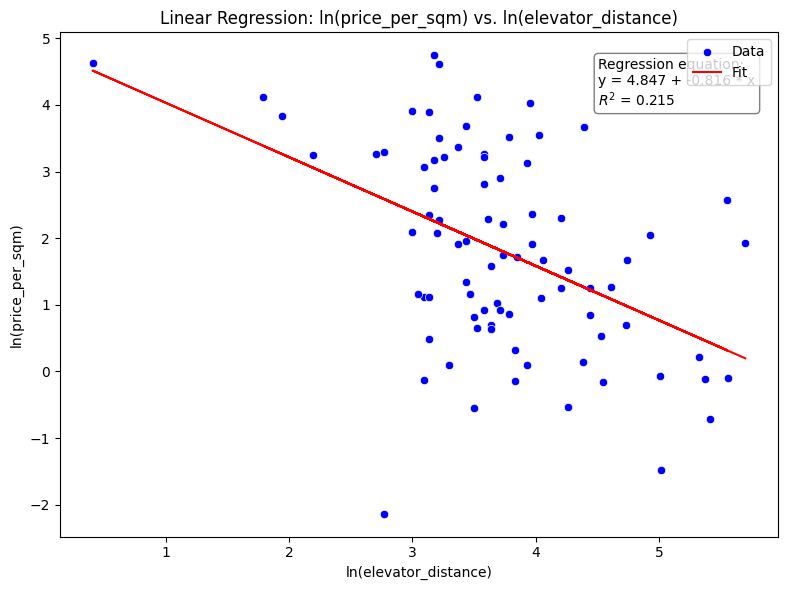

In [6]:
# Specify the columns
y_column = 'price_per_sqm'     # Dependent variable
x_column = 'elevator_distance' # Independent variable

# Analyze the relationship with log-transformed Y and X
linear_regression_plot(df, y_column=y_column, x_column=x_column, use_log_y=True, use_log_x=True)

In [8]:
print(df[['elevator_distance']].describe())

       elevator_distance
count          85.000000
mean           59.258824
std            60.024480
min             1.500000
25%            24.500000
50%            38.000000
75%            67.000000
max           299.000000


In [7]:
# Specify the columns
y_column = 'price_per_sqm'        # Dependent variable
x_column = 'elevator_distance'    # Independent variable

# Example 1: Raw values for both Y and X
results = perform_linear_regression(df, y_column, x_column,
                                    use_log_y=True, use_log_x=True)

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     22.74
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           7.82e-06
Time:                        10:37:17   Log-Likelihood:                -144.87
No. Observations:                  85   AIC:                             293.7
Df Residuals:                      83   BIC:                             298.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.8469      0.65

In [11]:
# Filter the DataFrame for the specific district
df_filtered = df[df['district'] == 'Омский район']
print(df_filtered[['elevator_distance']].describe())

       elevator_distance
count          33.000000
mean           30.090909
std            16.552216
min             1.500000
25%            23.000000
50%            25.000000
75%            36.000000
max            81.000000


In [12]:
# Specify the columns
y_column = 'price_per_sqm'                          # Dependent variable
x_column = 'elevator_distance'                      # Independent variable
df_filtered = df[df['district'] == 'Омский район']  # Filter the DataFrame for the specific district

# Transformed values for both Y and X
results = perform_linear_regression(df_filtered,
                                    y_column, x_column,
                                    use_log_y=True, use_log_x=True)

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     6.061
Date:                Fri, 01 Nov 2024   Prob (F-statistic):             0.0196
Time:                        11:06:08   Log-Likelihood:                -38.123
No. Observations:                  33   AIC:                             80.25
Df Residuals:                      31   BIC:                             83.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6643      0.60

In [13]:
# Filter the DataFrame for the specific district
df_filtered = df[df['district'] != 'Омский район']
print(df_filtered[['elevator_distance']].describe())

       elevator_distance
count          52.000000
mean           77.769231
std            69.731591
min            16.000000
25%            33.000000
50%            46.500000
75%            93.250000
max           299.000000


In [14]:
# Specify the columns
y_column = 'price_per_sqm'                          # Dependent variable
x_column = 'elevator_distance'                      # Independent variable
df_filtered = df[df['district'] != 'Омский район']  # Filter the DataFrame for the specific district

# Transformed values for both Y and X
results = perform_linear_regression(df_filtered,
                                    y_column, x_column,
                                    use_log_y=True, use_log_x=True)

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.3401
Date:                Fri, 01 Nov 2024   Prob (F-statistic):              0.562
Time:                        11:31:12   Log-Likelihood:                -78.965
No. Observations:                  52   AIC:                             161.9
Df Residuals:                      50   BIC:                             165.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4210      0.85

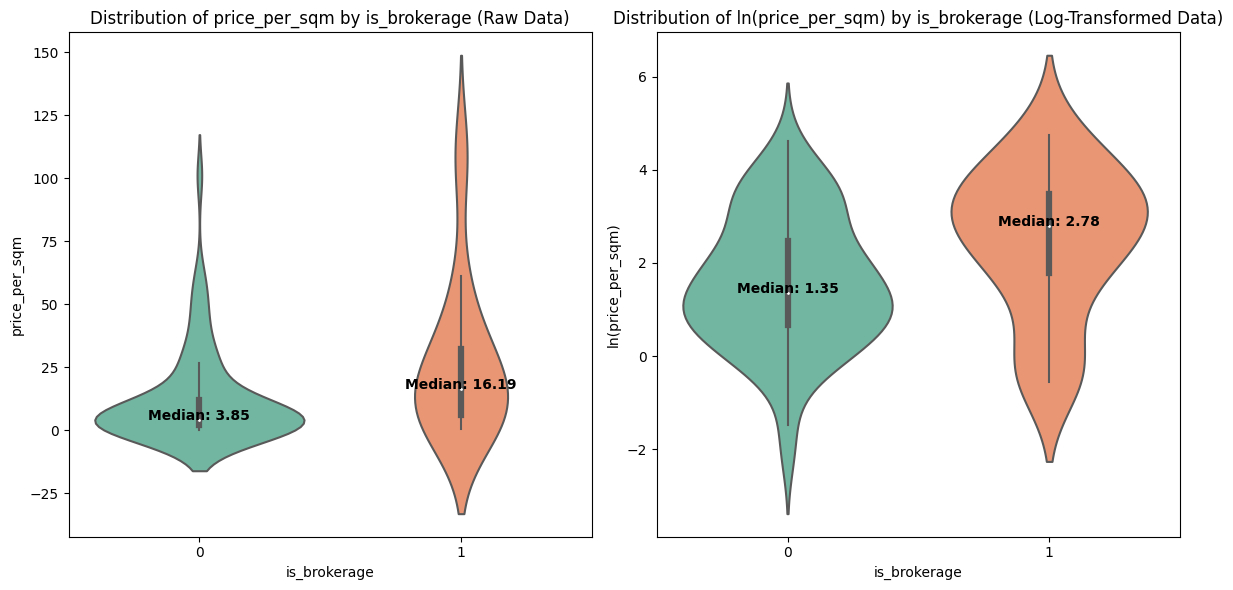

In [3]:
# Specify the columns
y_column = 'price_per_sqm'  # Continuous variable
x_column = 'is_brokerage'   # Binary variable with values 0 and 1

# Call the function
plot_violin_comparison(df, y_column, x_column)

/home/kaarlahti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kaarlahti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kaarlahti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kaarlahti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

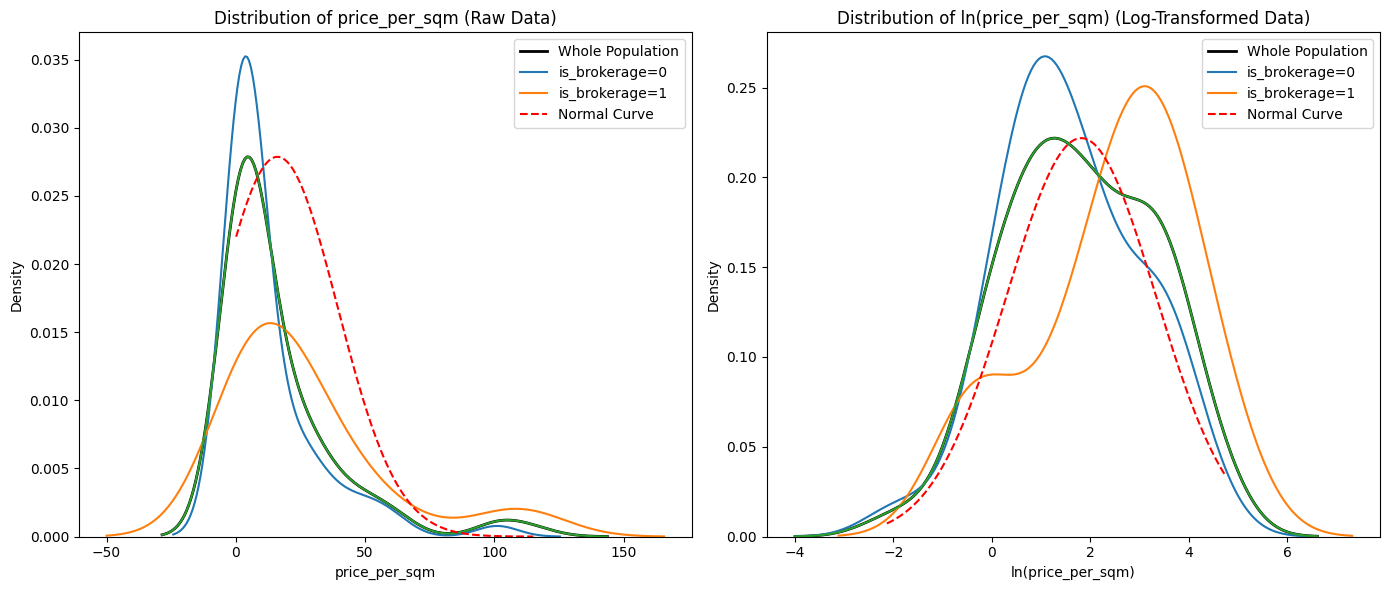

In [3]:
# Specify the columns
y_column = 'price_per_sqm'  # Continuous variable
x_column = 'is_brokerage'   # Binary variable with values 0 and 1

# Call the function
plot_kde_comparison(df, y_column, x_column)

In [3]:
# Specify the columns
y_column = 'price_per_sqm'  # Continuous variable
x_column = 'is_brokerage'   # Binary variable with values 0 and 1

# Call the function
results = perform_mann_whitney_tests(df, y_column, x_column)

Mann-Whitney U-test Results:

Raw Data:
Group 0 Median: 3.8462
Group 1 Median: 16.1907
U Statistic: 466.0000
P-value: 0.0230
Effect Size (Rank-Biserial Correlation): 0.3276
Sample Sizes: n0 = 63, n1 = 22

Log-Transformed Data:
Group 0 Median: 1.3471
Group 1 Median: 2.7840
U Statistic: 466.0000
P-value: 0.0230
Effect Size (Rank-Biserial Correlation): 0.3276
Sample Sizes: n0 = 63, n1 = 22
Log Base Used: 2.718281828459045


In [6]:
# Using a one-sided test
results = perform_mann_whitney_tests(df, y_column, x_column, alternative='less')


Mann-Whitney U-test Results:

Raw Data:
Group 0 Median: 3.8462
Group 1 Median: 16.1907
U Statistic: 466.0000
P-value: 0.0115
Effect Size (Rank-Biserial Correlation): 0.3276
Sample Sizes: n0 = 63, n1 = 22

Log-Transformed Data:
Group 0 Median: 1.3471
Group 1 Median: 2.7840
U Statistic: 466.0000
P-value: 0.0115
Effect Size (Rank-Biserial Correlation): 0.3276
Sample Sizes: n0 = 63, n1 = 22
Log Base Used: 2.718281828459045


In [7]:
# Using a one-sided test
results = perform_mann_whitney_tests(df, y_column, x_column, alternative='greater')

Mann-Whitney U-test Results:

Raw Data:
Group 0 Median: 3.8462
Group 1 Median: 16.1907
U Statistic: 466.0000
P-value: 0.9888
Effect Size (Rank-Biserial Correlation): 0.3276
Sample Sizes: n0 = 63, n1 = 22

Log-Transformed Data:
Group 0 Median: 1.3471
Group 1 Median: 2.7840
U Statistic: 466.0000
P-value: 0.9888
Effect Size (Rank-Biserial Correlation): 0.3276
Sample Sizes: n0 = 63, n1 = 22
Log Base Used: 2.718281828459045


In [10]:
# Specify the columns
y_column = 'price_per_sqm'  # Continuous variable
x_column = 'is_brokerage'   # Binary variable with values 0 and 1

# Call the function with logarithmic transformation using natural log (default)
results = mann_whitney_effect_sizes(df, y_column, x_column, log_transform=True, alternative='less')

Mann-Whitney U-test Results:
Group 0 (n=63) Median ln(price_per_sqm): 1.3471
Group 1 (n=22) Median ln(price_per_sqm): 2.7840
U Statistic: 466.0000
P-value: 0.0115
Z Statistic: -2.2827
Effect Size r: -0.2476
Cliff's Delta: 0.3276
Cliff's Delta CI (95.0%): (0.0457, 0.6094)
Logarithmic transformation applied using base 2.718281828459045.


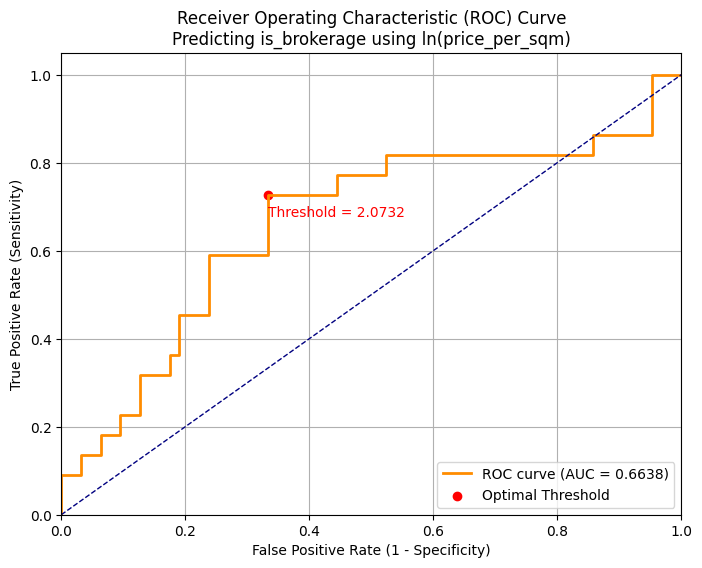

ROC Analysis Results:
AUC: 0.6638
Optimal Threshold: 2.0732
True Positive Rate at Optimal Threshold (Sensitivity): 0.7273
False Positive Rate at Optimal Threshold: 0.3333
Specificity at Optimal Threshold: 0.6667
Accuracy at Optimal Threshold: 0.6824
Precision at Optimal Threshold: 0.4324
Recall (Sensitivity) at Optimal Threshold: 0.7273
F1 Score at Optimal Threshold: 0.5424

Confusion Matrix at Optimal Threshold:
TN: 42, FP: 21, FN: 6, TP: 16

Logarithmic transformation applied using base 2.718281828459045.


In [5]:
# Specify the columns
y_column = 'price_per_sqm'  # Continuous predictor variable
x_column = 'is_brokerage'   # Binary outcome variable

# Perform ROC analysis with logarithmic transformation
results = perform_roc_analysis(df, y_column, x_column, log_transform=True)


In [3]:
# Specify the columns
y_column = 'price_per_sqm'  # Continuous predictor variable
x_column = 'is_brokerage'   # Binary outcome variable

# Perform logistic regression with logarithmic transformation
results = perform_logistic_regression(df, y_column, x_column, log_transform=True)


Logistic Regression Results:
Coefficients:
const           -1.893489
price_per_sqm    0.414401
dtype: float64

Odds Ratios and 95% Confidence Intervals:
                     OR      2.5%     97.5%
const          0.150546  0.058552  0.387077
price_per_sqm  1.513463  1.057716  2.165583

Model Fit Statistics:
Log-Likelihood: -45.7762
AIC: 95.5524
BIC: 100.4377
Pseudo R-squared: 0.0582

Classification Performance at Threshold 0.2622:
Accuracy: 0.6824
Precision: 0.4324
Recall (Sensitivity): 0.7273
Specificity: 0.6667
F1 Score: 0.5424

ROC AUC: 0.6638

Optimal threshold (Youden's Index): 0.2622

Logarithmic transformation applied using base 2.718281828459045.

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           42           21
Actual 1            6           16
